# Liver Disease

In [52]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_style("darkgrid")

In [53]:
data = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")

In [54]:
data['Gender'].replace({'Male': 1, 'Female': 0},inplace = True)
data['Dataset'].replace({1: 0, 2: 1},inplace = True)
data.head(30)

,Gender,Dataset,Age,Total Bilirubin,Direct Bilirubin,Alkhpos,SGPT,SGOT,Total Proteins,Albumin,A/G Ratio
0,0,0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,1,0,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,1,0,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,1,0,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,1,0,72,3.9,2.0,195,27,59,7.3,2.4,0.40
5,1,0,46,1.8,0.7,208,19,14,7.6,4.4,1.30
6,0,0,26,0.9,0.2,154,16,12,7.0,3.5,1.00
7,0,0,29,0.9,0.3,202,14,11,6.7,3.6,1.10
8,1,1,17,0.9,0.3,202,22,19,7.4,4.1,1.20
9,1,0,55,0.7,0.2,290,53,58,6.8,3.4,1.00


Yes = 167
No = 416


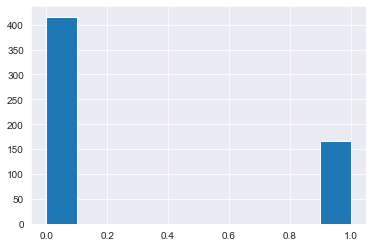

In [55]:
data["Dataset"].hist()
numOfYes = 0
numOfNo = 0
for i in range (len (data)):
    if data.loc[i, "Dataset"] == 1:
        numOfYes += 1
    else:
        numOfNo += 1
print("Yes = "+ str(numOfYes))
print("No = " + str(numOfNo))

['Age', 'Total Bilirubin', 'Direct Bilirubin', 'Alkhpos', 'SGPT', 'SGOT', 'Total Proteins', 'Albumin', 'A/G Ratio']


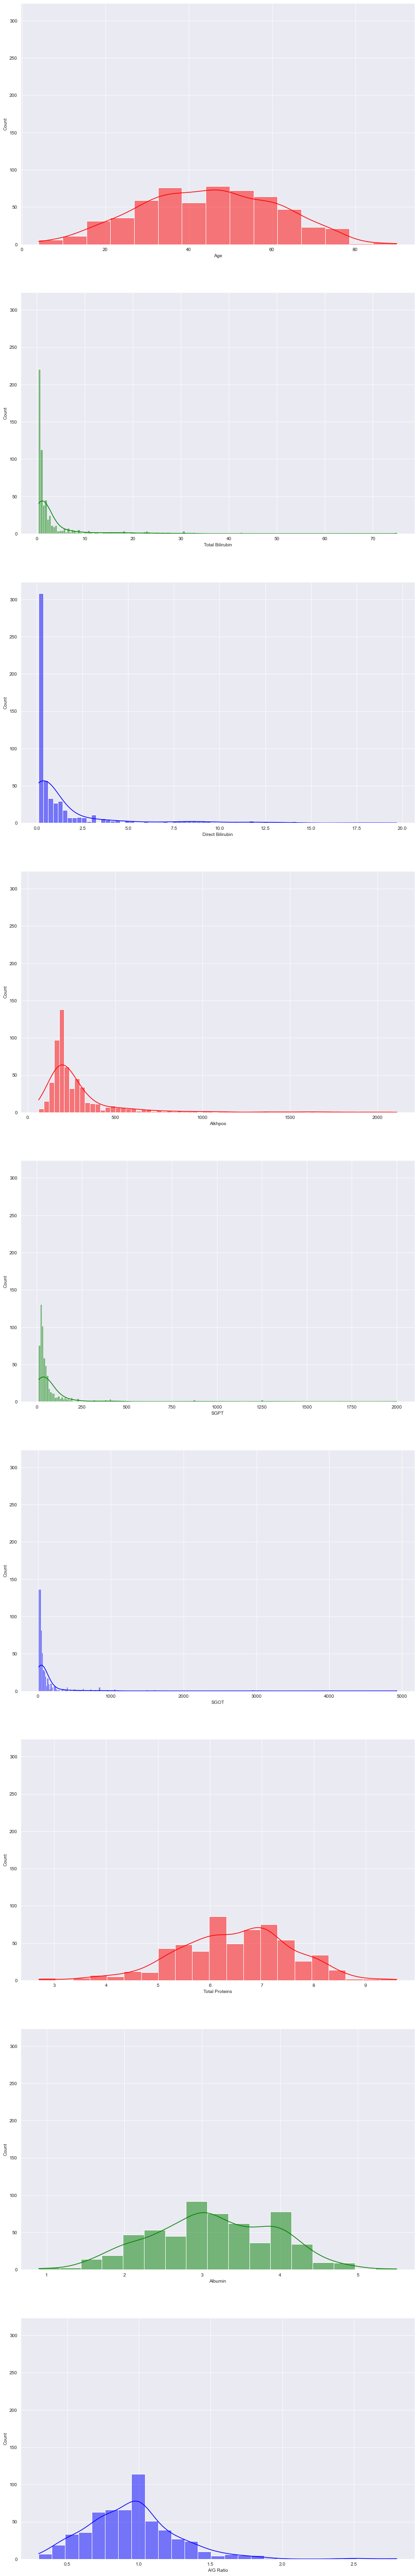

In [56]:
fig, axes = plt.subplots(9, 1, figsize=(15, 100), sharey=True)
"""sns.histplot(data, ax=axes[0], x="Age", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="Total Bilirubin", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="Direct Bilirubin", kde=True)"""
lab = list(data.columns[2:])
print(lab)
color1 = ['r','g','b']
for i in range(len(lab)):
    sns.histplot(data, ax = axes[i], x = lab[i], kde = True, color = color1[i%3])

In [57]:
#Fungsi untuk menghitung prior probability dengan masukan df(data point) dan Y(diagnosis)
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    #Classes isinya dalah list dari df[Y] yang unik, yaitu 0 dan 1
    prior = [len(df[df[Y]==i])/len(df) for i in classes]
    #Disini perhitungan prior probability.
    return prior

In [58]:
#Fungsi menghitung distribusi gaussian.
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    #df akan berisi df[dataset dimana df[Y] bernilai 0 atau 1]
    #Jadi maksudnya, df akan berisikan semua data dimana df[Y] adalah 0 untuk iterasi pertama
    #Dan selanjutnya df akan berisikan semua data dimana df[Y] adalah 1 untuk interasi selanjutnya
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std**2)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    #Fungsi perhitungan utama, rujuk rumus diatas
    return p_x_given_y

In [59]:
def naive_bayes_gaussian(df, X, Y):
    # Features adalah semua column nomor 2 kekanan
    features = list(df.columns)[2:]

    # Panggil fungsi prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # Array kosong untuk menyimpan hasil perhtiugnan
    for x in X:
        # Kita iterasi untuk semua data sepanjang Xtest
        labels = sorted(list(df[Y].unique()))
        likelihood = [1 for i in range(len(labels))]
        #List comprehension
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])
        # calculate posterior probability (numerator only)
        post_prob = [likelihood[j] * prior[j] for j in range(len(labels))]
        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

In [60]:
def TrainTestSplit(df, test_size):
    testSampleSize = len(df) * test_size
    if (testSampleSize - int(testSampleSize)) >= 0.5:
        testSampleSize =  int(testSampleSize) + 1
    else:
        testSampleSize = int(testSampleSize)
    indices = []
    trainArr = []
    testArr = []
    count = 0
    for i in range(testSampleSize):
        y = random.randint(0, len(df))
        while y in indices:
            y = random.randint(0, len(df))
        indices.append(y)
        count += 1
    
    for i in indices:
        testArr.append(df.iloc[i:i+1])
    for i in range(len(df)):
        if i not in indices:
            trainArr.append(df.iloc[i:i+1])
    return pd.concat(trainArr).sort_index(ascending = True), pd.concat(testArr).sort_index(ascending = True)

In [61]:
def ConfusionMatrix (yTest, yPred):
    matrix = np.array([[0,0], [0,0]])
    for i in range (len(yTest)):
        if yPred[i] == 1:
            if yTest[i] == 1:
                matrix[0][0] += 1
            else:
                matrix [0][1] += 1
        else:
            if yTest[i] == 1:
                matrix[1][0] += 1
            else:
                matrix [1][1] += 1
    return matrix

# Explanation for confusion matrix
# Matrixnya adalah 
# [[TP, FP],
#  [FN, TN]]
# Logikanya adalah, untuk sepanjang yTest (sbenernya sama saja kalo makai yPrediction, karena jumlah mereka sama
# ini karena logically, yTest adalah hasil sesungguhnya (yg asli), sementara yPred adalah hasil ketika 
# masukannya adalah xtest (yang artinya sama aja seperti ytest)  )
# jika nilai yPrediction adalah 1 , dan di nilai i yang sama, yTest juga 1 (sama sama Disease)
# PADA matrix index [0][0] akan ditambah 1, karena disitulah nilai True Positive (TP) yang berarti diagnosis Disease
# pada prediction sesuai dengan diagnosis pada test
# dan sebaliknya, jika nilai yPrediction adalah 0, dan pada i yang sama yTest juga 0 (sama sama No disease)
# maka pada index [1][1] akan ditambah 1 karena disitu nilai True Negative, artinya diagnosis No disease sesuai.
# Perlu diperhatikan ini dilakukan untuk sepanjang yTest, yang berarti berlaku untuk semua nilai y, artinya, 
# kalo kita jumlahkan jumlah nilai pada tiap index, hasilnya adalah jumlah y itu sendiri. #

In [62]:
def f1 (confusionMatrix):
    tp = confusionMatrix [0][0]
    fp = confusionMatrix[0][1]
    fn = confusionMatrix [1][0]

    precision = tp / (tp + fp)
    #Seberapa akurat data kita
    recall = tp / (tp + fn)
    return 2 * (precision * recall )/ (precision + recall)

In [63]:
train, test = TrainTestSplit(data, test_size= 0.2)

X_test = test.iloc[:,2:].values
Y_test = test.iloc[:,1].values

Y_pred = naive_bayes_gaussian(train, X=X_test, Y="Dataset")

cm = ConfusionMatrix(Y_test, Y_pred)
print("The confusion matrix is : \n{}".format(cm))
print("The accuracy is : {}" .format(f1(cm)))
print("The actual diagnosis is \n{} \nThe Predicted diagnosis based on the ML model is \n{}\nWhere 0 is disease and 1 is no disease".format(Y_test, Y_pred))

The confusion matrix is : 
[[32 57]
 [ 0 28]]
The accuracy is : 0.5289256198347108
The actual diagnosis is 
[0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 0] 
The Predicted diagnosis based on the ML model is 
[1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1
 0 1 0 1 0 0]
Where 0 is disease and 1 is no disease


# membandingkan dengan Logistic Regression dengan sklearn

In [64]:
#membandingkan dengan logistic regression yang menggunakan sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix

In [65]:
X = data[['Gender', 'Dataset', 'Age', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkhpos', 'SGPT', 'SGOT', 'Total Proteins', 'Albumin', 'A/G Ratio']]
y = data.Dataset

In [66]:
#membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(np.nan_to_num(X), y, test_size=0.2)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(466, 11)
(466,)
(117, 11)
(117,)


In [67]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [68]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [69]:
# memprediksi keluaran
log_predicted= logreg.predict(X_test)
logreg_score = logreg.score(X_train, y_train) * 100
logreg_score_test = logreg.score(X_test, y_test) * 100

In [70]:
# print output
print('Logistic Regression Training Score: n', logreg_score)
print('Logistic Regression Test Score: n', logreg_score_test)
print('Accuracy: n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: n', confusion_matrix(y_test,log_predicted))

Logistic Regression Training Score: n 100.0
Logistic Regression Test Score: n 100.0
Accuracy: n 1.0
Confusion Matrix: n [[82  0]
 [ 0 35]]
